# Personality Classification using Machine Learning

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the dataset
data = pd.read_csv(r"D:\Project_3\archive (1)\personality_synthetic_dataset.csv")

In [9]:
# Explore the data
print(data.head())
print("\nClass distribution:")
print(data['personality_type'].value_counts())

  personality_type  social_energy  alone_time_preference  talkativeness  \
0        Extrovert       6.794295               3.854670       8.725446   
1         Ambivert       6.378988               5.731157       7.029529   
2         Ambivert       7.459421               6.322263       3.922269   
3        Extrovert       6.159626               3.097837       6.019093   
4        Introvert       5.568462               6.986722       3.913240   

   deep_reflection  group_comfort  party_liking  listening_skill   empathy  \
0         2.515151       7.097368      8.588762         6.774799  6.430132   
1         7.274493       4.111199      3.258248         5.550909  3.958179   
2         4.622261       5.343276      7.452152         9.483990  6.127654   
3         1.965440       7.837140     10.000000         9.436733  8.949684   
4         9.926161       1.650483      0.362298         7.470387  6.756837   

   creativity  ...  spontaneity  adventurousness  reading_habit  \
0    6.142968

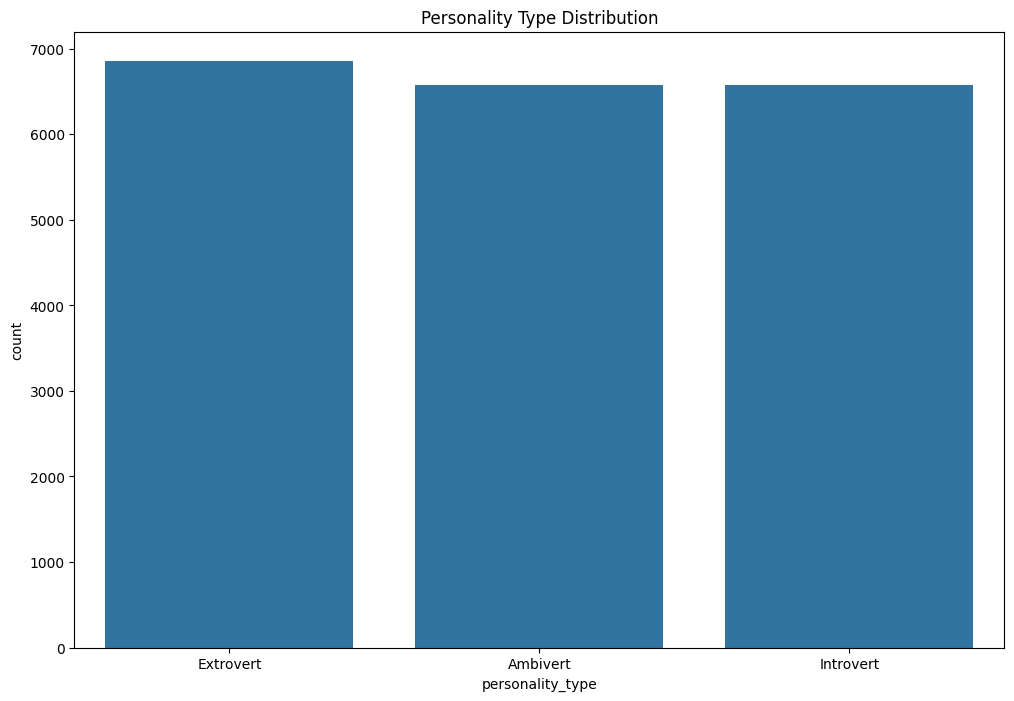

In [10]:
# Visualize feature distributions
plt.figure(figsize=(12, 8))
sns.countplot(x='personality_type', data=data)
plt.title('Personality Type Distribution')
plt.show()


In [11]:
# Prepare features and target
X = data.drop('personality_type', axis=1)
y = data['personality_type']

In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [13]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Initialize and train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Make predictions
y_pred = clf.predict(X_test)

In [16]:
 # Evaluate the model
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Evaluation:
Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

    Ambivert       0.99      0.99      0.99      1972
   Extrovert       1.00      1.00      1.00      2057
   Introvert       1.00      1.00      1.00      1971

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



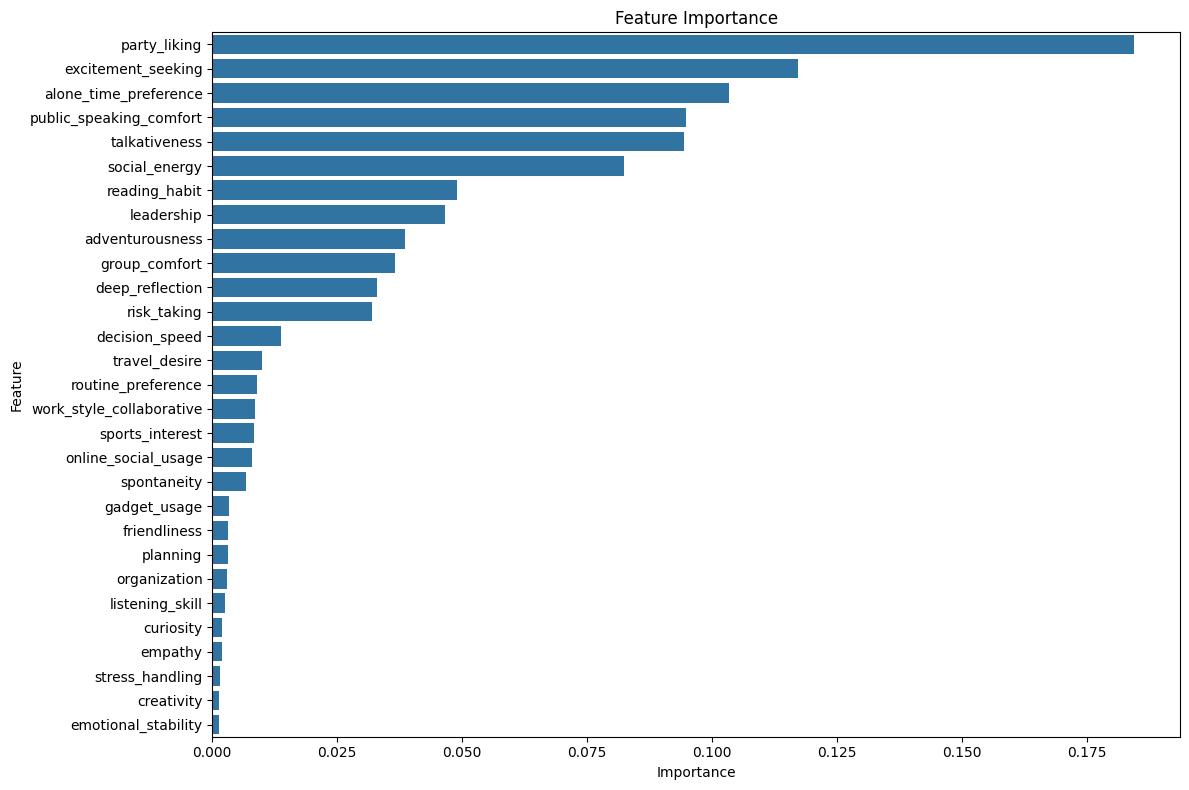

In [17]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': data.columns[1:],  # Skip the target column
    'Importance': clf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [18]:
# Example prediction
sample = X_test[0].reshape(1, -1)
sample_pred = clf.predict(sample)
print(f"\nSample prediction: {sample_pred[0]}")
print(f"Actual value: {y_test.iloc[0]}")


Sample prediction: Ambivert
Actual value: Ambivert


In [19]:
import joblib

In [24]:
rf_m.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
# since rf model gives the best accuracy, we will use the "svc models"
from sklearn.ensemble import RandomForestClassifier
rf_m = RandomForestClassifier()


In [25]:
joblib.dump(rf_m,'model_presonality.pt')

['model_presonality.pt']